# Limpeza e Tratamento de Dados
-----
DataSet = Churn.csv
* Análise de retotividade de clientes

In [2]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [3]:
data = pd.read_csv('datasets/Churn.csv', sep=";")
data.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [4]:
data.shape

(999, 12)

In [6]:
data.columns = ["id","Score","Estado","Genero","Idade","Patrimonio","Saldo","Produtos","TemCartCredito","Ativo","Salario","Saiu"]

In [9]:
data.head()

,id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


# Explorando Dados Categóricos
---
* Estado
* Genero

In [13]:
# Estado
agrup = data.groupby(['Estado']).size()
agrup

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

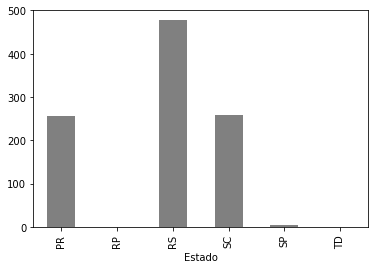

In [15]:
agrup.plot.bar(color='gray');

In [16]:
# Genero 
agrup = data.groupby(['Genero']).size()
agrup

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

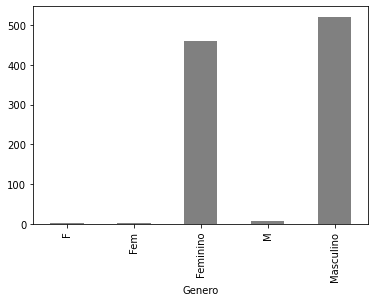

In [17]:
agrup.plot.bar(color='gray');

# Explorando Dados Quantativos
---
* Score
* Idade
* Saldo
* Salario


In [19]:
# Score
data['Score'].describe()


count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

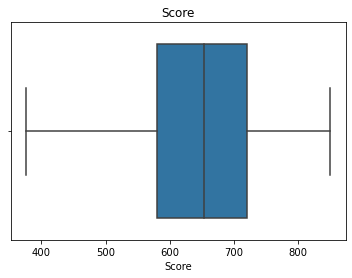

In [22]:
srn.boxplot(data['Score']).set_title('Score');

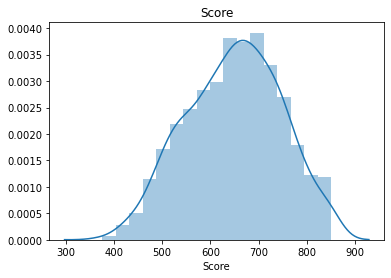

In [24]:
srn.distplot(data['Score']).set_title('Score');

In [26]:
# Idade
data['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

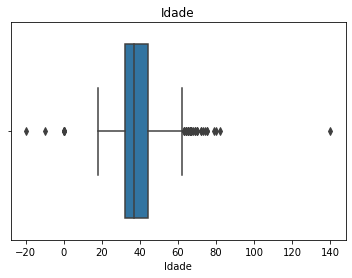

In [28]:
srn.boxplot(data['Idade']).set_title('Idade');

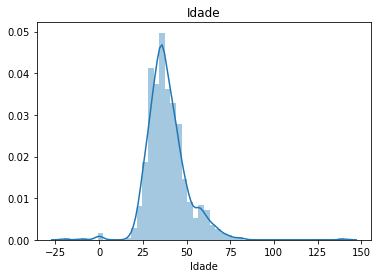

In [31]:
srn.distplot(data['Idade']).set_title('Idade');

In [32]:
# Saldo
data['Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

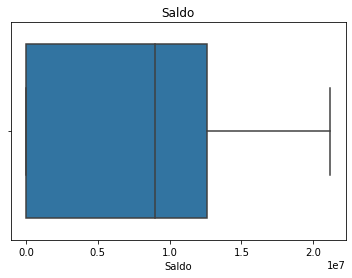

In [34]:
srn.boxplot(data['Saldo']).set_title('Saldo');

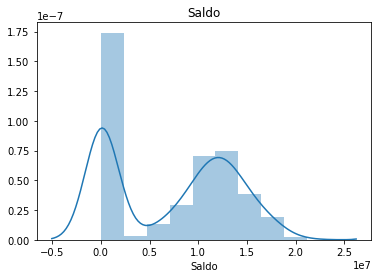

In [36]:
srn.distplot(data['Saldo']).set_title('Saldo');

In [38]:
# Salario
data['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

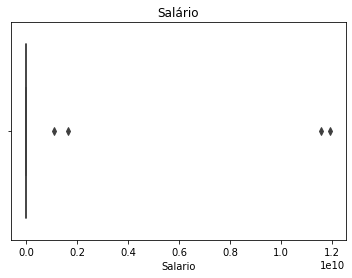

In [40]:
srn.boxplot(data['Salario']).set_title('Salário');

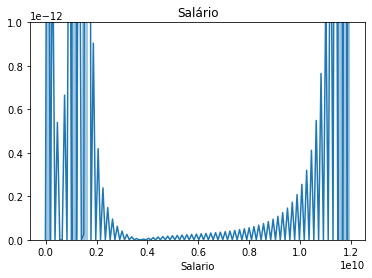

In [43]:
srn.distplot(data['Salario']).set_title('Salário');

In [45]:
# Verificar se existem valores Na's
data.isnull().sum()

id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

# Processo de tratamento dos dados
---

In [7]:
# Salários: substituição de Na's pela médiana
data['Salario'].describe()



count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

In [45]:
median = sts.median(data['Salario'].dropna())
median

8637195.5

In [46]:
data['Salario'].fillna(median, inplace=True)

In [47]:
data['Salario'].isnull().sum()

0

In [11]:
# Genero: falta de padronização e Na's
group = data.groupby(['Genero']).size()
group

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [12]:
# encontrar o total de Na's
data['Genero'].isnull().sum()

8

In [13]:
# Preencher com Masculino
data['Genero'].fillna('Masculino', inplace=True)

In [14]:
data['Genero'].isnull().sum()

0

In [16]:
# Padronizar de acordo com o domínio 
data.loc[data['Genero']=='M', 'Genero'] = 'Masculino'
data.loc[data['Genero'].isin(['Fem','F']), 'Genero'] = 'Feminino'
group = data.groupby(['Genero']).size()
group

Genero
Feminino     464
Masculino    535
dtype: int64

In [17]:
# Idade: fora do domínio 
data['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [18]:
# Visualizando
data.loc[(data['Idade']<0)|(data['Idade']>120)]

,id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [20]:
# calculando a mediana da idade
median = sts.median(data['Idade'])
median

37

In [22]:
# Atribuindo a mediana nas idades 
data.loc[(data['Idade']<0)|(data['Idade']>120), "Idade"] = median

In [23]:
data.loc[(data['Idade']<0)|(data['Idade']>120)]

,id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [26]:
# Busca de dados duplicados
data[data.duplicated(['id'], keep=False)]

,id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [27]:
# Excluindo id duplicado 
data.drop_duplicates(subset='id', keep='first', inplace=True)
data[data.duplicated(['id'], keep=False)]

,id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [29]:
# Estados fora de domínio 
group = data.groupby(['Estado']).size()
group

Estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

In [31]:
data.loc[data['Estado'].isin(['RP','SP','TD'])]

,id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
22,23,510,RP,Feminino,38,4,0,1,1,0,11891353.0,1
28,29,574,SP,Feminino,43,3,14134943,1,1,1,10018743.0,0
32,33,553,SP,Masculino,41,9,11011254,2,0,0,8189881.0,0
55,56,619,SP,Masculino,43,1,12521192,1,1,1,11341049.0,0
75,76,735,SP,Feminino,21,1,17871819,2,1,0,22388.0,0
93,95,769,TD,Masculino,29,8,0,2,1,1,17229061.0,0


In [33]:
data.loc[data['Estado'].isin(['RP','SP','TD']), 'Estado'] = 'RS'

In [36]:
group = data.groupby('Estado').size()
group

Estado
PR    257
RS    483
SC    258
dtype: int64

In [39]:
# Salario: Outliers -> considerar outliers valores a cima de 2 x desvio padrão
desv = sts.stdev(data['Salario'])
desv

528988918.4679201

In [52]:
# Encontrando os outliers
data.loc[data['Salario']>=2*desv]

,id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [49]:
median = sts.median(data['Salario'])
median

8637195.5

In [53]:
data.loc[data['Salario']>=2*desv, 'Salario'] = median
data.loc[data['Salario']>=2*desv]

,id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [54]:
data.head()

,id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [55]:
data.shape

(998, 12)